# Homework 1: Perceptrons
### Due Thursday, January 17, 2019, 5pm
#### Jesse Zhu
#### ML-W2019

Using the MNIST hand-written digits dataset, we aim to use perceptrons to categorize the labeled data through supervised learning. As this is a single-layer, the result is not expected to be perfect, but should be noticeably better than random. Each data point will be 785 values between 0 and 1, representing the grayscale value of each pixel in the original image. These values will be used to update our weight values over the course of 50 epochs, resulting in our 10 perceptrons (digits 0 to 9) being trained at the end. Finally, we will run test data through these trained perceptrons and take the maximum value of the 10 perceptrons as the predicted result.

In [70]:
#import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [30]:
#IMPORT DATA#################
testfile = "mnist_test.csv"
trainfile = "mnist_train.csv"

# test_data = pd.read_csv(testfile)
# train_data = pd.read_csv(trainfile)

#Data is 785 columns by N rows. First column = Label (0-9), others = 0:255
test_data = np.genfromtxt(testfile, skip_header=True, delimiter=',')
train_data = np.genfromtxt(trainfile, skip_header=True, delimiter=',')

#PREPROCESSING###############

#SCALE by 255
test_data[:,1:] /= 255
train_data[:,1:] /= 255
#print((test_data[0,:]))

In [209]:
#Accuraccy function
def acc(weights, data, debug = 0):
    """
    input: 
        weights: matrix of 785 weights by 10 classes, where the first weight is the bias
        data: matrix of N data points by 785 values, where the first value is the target (0-9), and the rest are
            scaled gray-scale values between 0 and 1
    output: Percentage of correct classifications, where a classification is taken using the highest perceptron
        output value
    """
    length = len(data[:,0])
    xi = np.append(np.ones([length,1]), data[:, 1:],1)
    out = xi @ weights[:, :]
    amax = out.argmax(axis=1)
    if debug:
        print(out.shape)
        print(amax[0:25])
    ret = np.sum(amax == data[:,0])
    return ret/length

#Confusion matrix
def cm(weights, data):
    length = len(data[:,0])
    xi = np.append(np.ones([length,1]), data[:, 1:],1)
    m = np.zeros([10,10])
    for i in range(0, length):
        actual = int(data[i, 0])
        predic = int((xi[i,:] @ weights).argmax(axis=0))
        m[actual, predic] += 1
        
    return m.astype(int)

#Drawing function
def draw_digit(data):
    """
    input:
        1x785 matrix of grayscaled pixel values
    output: image of (1:785 pixels, skipping first label)
    """
    img = np.reshape(data[1:], (28, 28))
    print(img)
    plt.imshow(img)
    plt.show
    
#Training function
def train(weights, data, lr, debug = 0):
    """
    input: 
        weights: matrix of 785 weights by 10 classes, where the first weight is the bias
        data: matrix of N data points by 785 values, where the first value is the target (0-9), and the rest are
            scaled gray-scale values between 0 and 1
        lr: learning rate (~ 0 to 1)
    output:
        Altered input weights matrix
    """
    length = len(data[:,0])

    for i in range(0,length):
        xi = np.append([1], data[i, 1:]) #add "1" to input beginning for offset -> 1x785
        out = np.add((data[i, 1:] @ weights[1:, :]), weights[0, :]) #1 by 10 matrix

        target = np.zeros(10)
        tindex = int(data[i,0])
        target[tindex] = 1 #1x10 of 0s, with target index = 1
      
        out[out < 0] = 0
        out[out > 0] = 1
        if i == 0 and debug:
            print(target-out)

        deltaw = lr * np.outer(xi,(target - out)) #785x1 * 1x10 = 785x10
        if i == 0 and debug:
            print(deltaw[0:10,0:5])
            print(xi[0:10])
            print(deltaw.sum())
            print(weights.sum())

        weights += deltaw
        if i == 0 and debug:
            print(weights.sum())
    
    return

In [187]:
init_weights = (np.random.rand(785,10) * 0.10) - 0.05
learning_rates = [0.001, 0.01, 0.1, 1.0]

***RATE =  0.001 ***************
[[ 942    0   12    2    2   10    8    1    3    0]
 [   0 1074    6    2    1   22    0    1   26    3]
 [   7    2  968    2    9   11   10    9    6    8]
 [   1    1   40  777    0  156    3    8    8   16]
 [   0    3   18    1  839    2    8    1    4  106]
 [  13    2   20    5   10  809    7    2   12   12]
 [   8    2   13    0    6   39  882    1    6    1]
 [   5    9   31    6    8   15    2  906    3   42]
 [  12    6   43   25   15   98    7    6  744   18]
 [   7    2   21   11   19   17    0   15    9  908]]


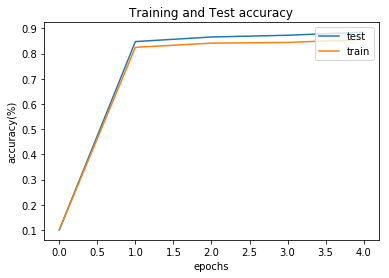

***RATE =  0.01 ***************
[[ 936    0   39    0    0    1    3    1    0    0]
 [   0 1102    6    0    0   19    0    0    8    0]
 [  10    2  990    0    2    1   13    7    2    5]
 [   7    6  118  726    0  122    2   11    5   13]
 [   3    5   39    0  747    1   19    4    6  158]
 [  23    2   62    3    4  750    6    5   14   23]
 [  15    3   41    0    2   21  872    1    3    0]
 [   6   15   67    1    2    3    2  911    0   20]
 [  29   20  170    3    7   32    4   13  686   10]
 [   9   10   75   10    8   10    1   24    4  858]]


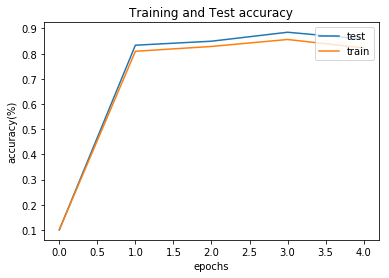

***RATE =  0.1 ***************
[[ 961    0    9    0    1    3    5    1    0    0]
 [   0 1080    4    0    1   47    0    0    3    0]
 [  12    8  952    0    7    6   20   10    7   10]
 [   6   20   64  642    1  237    1   12    6   21]
 [   0    3   16    0  838    2   18    3    1  101]
 [   9    3   26    1   10  815    7    4    8    9]
 [   9    3   11    0    2   39  891    3    0    0]
 [   5   25   20    1    6   11    2  928    1   28]
 [  20   43   96    3   18  129    6   17  612   30]
 [  13    7   36    7   17   20    5   33    0  871]]


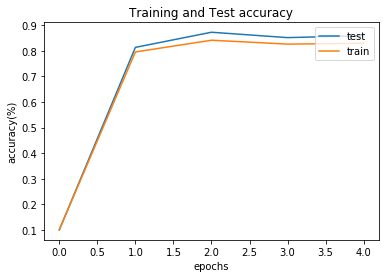

***RATE =  1.0 ***************
[[ 953    0   15    1    1    5    2    1    2    0]
 [   0 1035    2    0    1   81    0    0   16    0]
 [   9    2  942    0    6   16   12   10   26    9]
 [   4    4   35  610    2  291    0    9   28   27]
 [   2    3   14    1  810    3   13    0    8  128]
 [   9    2   26    1    5  810    4    4   17   14]
 [  12    3   16    0    8   71  839    3    6    0]
 [   8   16   23    1    4   11    1  923    4   36]
 [  11    5   13    3   10   81    5    6  832    8]
 [  12    3   25   10   11   19    1   14    8  906]]


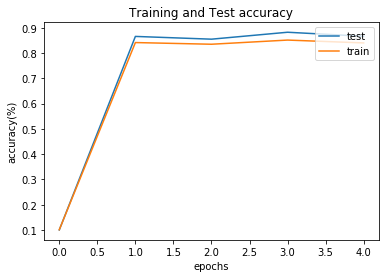

In [212]:
#draw_digit(test_data[0, :])
for rate in learning_rates:
    print("***RATE = ",rate,"***************")
    w = np.copy(init_weights)
    acc_test = []
    acc_train = []

    acc_test.append(acc(w, test_data))
    acc_train.append(acc(w, train_data))

    for i in range(0,4):
        train(w, test_data, rate)
        acc_test.append(acc(w, test_data))
        acc_train.append(acc(w, train_data))

    print(cm(w, test_data))

    plt.plot(acc_test)
    plt.plot(acc_train)
    plt.xlabel("epochs")
    plt.ylabel("accuracy(%)")
    title = "Training and Test accuracy, learning rate = " + str(rate)
    plt.title("Training and Test accuracy")
    plt.legend(("test", "train"),loc='upper right')
    plt.show()

### Appendix of Resources
1. Matrix multiplication
https://stackoverflow.com/questions/21562986/numpy-matrix-vector-multiplication

```python
a = np.random.rand(1,3)
b = np.random.rand(3,5)
print(a@b)

print(np.zeros([3,3]))

np.add([1, 2, 3], [5, 5, 0])
```

2. Argmax arrays
https://stackoverflow.com/questions/5469286/how-to-get-the-index-of-a-maximum-element-in-a-numpy-array-along-one-axis
```python
mm.argmax(axis=1)
```

3. Plotting 2d arrays
https://stackoverflow.com/questions/16492830/colorplot-of-2d-array-matplotlib

4. Count # Equal Array Elements
https://stackoverflow.com/questions/25490641/check-how-many-elements-are-equal-in-two-numpy-arrays-python
```python
np.sum(a == b)
```

5. Multiplying 1-D arrays / transposing
https://stackoverflow.com/questions/23566515/multiplication-of-1d-arrays-in-numpy
```python
b[:, None]
```

6. Positive/Negative values -> 1, 0
https://stackoverflow.com/questions/10335090/numpy-replace-negative-values-in-array

```python
f = np.array([-2, -1, 0, 0, 3, 5, -4])
f[f < 0] = 0
f[f > 0] = 1
```

7. Python numpy references vs call by reference?
https://stackoverflow.com/questions/11585793/are-numpy-arrays-passed-by-reference/11585888
`weights = np.add(weights, deltaw) #DOES NOT WORK`

`weights += blah` works

In [133]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = [10, 11, 12]
a[1,:] = np.add(a[1,:], b)
print(2*a)
print(7-a)
c = np.array([0.1, 0.2, 0.3, -0.4, -0.5, -0.6])
print(np.ceil(c))
d = np.array([[1, 2, 3, 4, 5]])
e = np.array([[0, 0, 1]])
print(np.transpose(d)@e)
f = np.array([-2, -1, 0, 0, 3, 5, -4])
f[f < 0] = 0
f[f > 0] = 1
print(f)
g = np.zeros(5)
g[4] = 1
print(g)
a1 = [1, 2, 3, 4, 5]
b1 = [10, 10, 10]
print(np.outer(a1,b1))

[[ 2  4  6]
 [28 32 36]]
[[  6   5   4]
 [ -7  -9 -11]]
[ 1.  1.  1. -0. -0. -0.]
[[0 0 1]
 [0 0 2]
 [0 0 3]
 [0 0 4]
 [0 0 5]]
[0 0 0 0 1 1 0]
[0. 0. 0. 0. 1.]
[[10 10 10]
 [20 20 20]
 [30 30 30]
 [40 40 40]
 [50 50 50]]


In [202]:
c1 = np.array([[1, 2, 3],[1,2,3]])
d1 = np.ones([2,1])
print(d1)
e1 = np.append(d1, c1, 1)
print(e1)

[[1.]
 [1.]]
[[1. 1. 2. 3.]
 [1. 1. 2. 3.]]
